In [19]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
data = pd.read_csv('../data/polars/ff95-skip-intro.csv', delimiter=';')
data = data.rename(columns={'twa/tws': 'twa'})
data = data.set_index('twa')
data

,6,8,10,12,14,16,20
twa,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
52,5.56,6.36,6.61,6.72,6.78,6.82,6.91
60,5.92,6.63,6.83,6.92,7.00,7.04,7.16
75,6.24,6.85,7.09,7.23,7.35,7.45,7.53
90,6.24,6.85,7.20,7.51,7.71,7.87,8.15
110,5.58,6.63,7.14,7.63,8.14,8.49,8.96
120,5.41,6.51,7.07,7.60,8.12,8.52,9.49
135,4.89,6.03,6.77,7.24,7.80,8.44,9.97
150,4.15,5.22,6.16,6.79,7.23,7.74,8.97


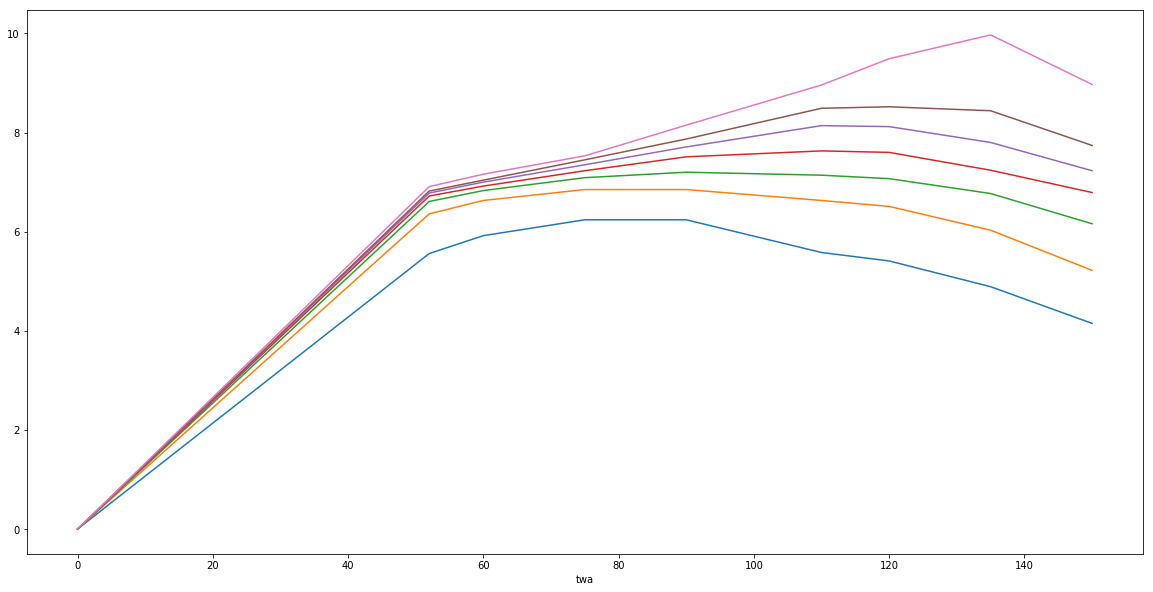

In [94]:
def show(data):
    _, ax = plt.subplots(figsize=(20, 10))
    data['6'].plot(ax=ax)
    data['8'].plot(ax=ax)
    data['10'].plot(ax=ax)
    data['12'].plot(ax=ax)
    data['14'].plot(ax=ax)
    data['16'].plot(ax=ax)
    data['20'].plot(ax=ax)
    plt.show()

show(data)

            6         8        10        12        14        16        20
twa                                                                      
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1    0.173530  0.216692  0.226058  0.224657  0.225693  0.228065  0.244681
2    0.347162  0.406020  0.420767  0.415775  0.407983  0.404857  0.412754
3    0.517751  0.592093  0.612116  0.603775  0.587602  0.579235  0.578768
4    0.685319  0.774935  0.800132  0.788681  0.764565  0.751213  0.742735
5    0.849886  0.954569  0.984841  0.970515  0.938892  0.920806  0.904667
6    1.011475  1.131020  1.166268  1.149302  1.110599  1.088030  1.064578
7    1.170107  1.304310  1.344440  1.325064  1.279703  1.252898  1.222481
8    1.325803  1.474463  1.519384  1.497825  1.446223  1.415426  1.378387
9    1.478587  1.641504  1.691124  1.667608  1.610175  1.575629  1.532309
10   1.628478  1.805456  1.859687  1.834436  1.771577  1.733520  1.684260
11   1.775499  1.966342  2.025100  1.9

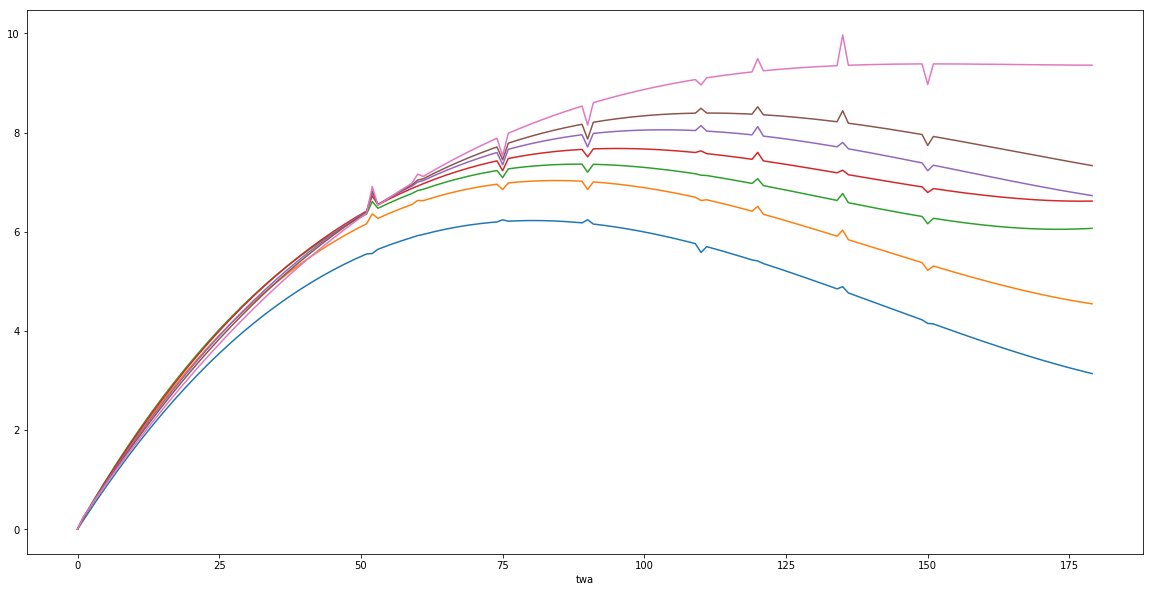

            6         8        10        12        14        16        20
twa                                                                      
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1    0.173530  0.216692  0.226058  0.224657  0.225693  0.228065  0.244681
2    0.347162  0.406020  0.420767  0.415775  0.407983  0.404857  0.412754
3    0.517751  0.592093  0.612116  0.603775  0.587602  0.579235  0.578768
4    0.685319  0.774935  0.800132  0.788681  0.764565  0.751213  0.742735
5    0.849886  0.954569  0.984841  0.970515  0.938892  0.920806  0.904667
6    1.011475  1.131020  1.166268  1.149302  1.110599  1.088030  1.064578
7    1.170107  1.304310  1.344440  1.325064  1.279703  1.252898  1.222481
8    1.325803  1.474463  1.519384  1.497825  1.446223  1.415426  1.378387
9    1.478587  1.641504  1.691124  1.667608  1.610175  1.575629  1.532309
10   1.628478  1.805456  1.859687  1.834436  1.771577  1.733520  1.684260
11   1.775499  1.966342  2.025100  1.9

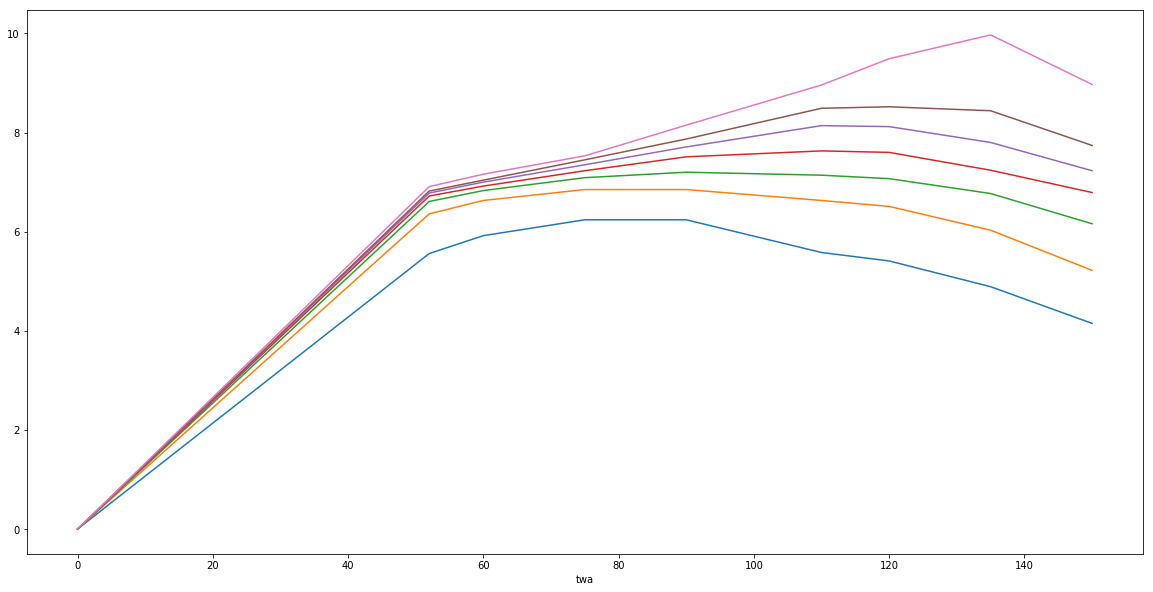

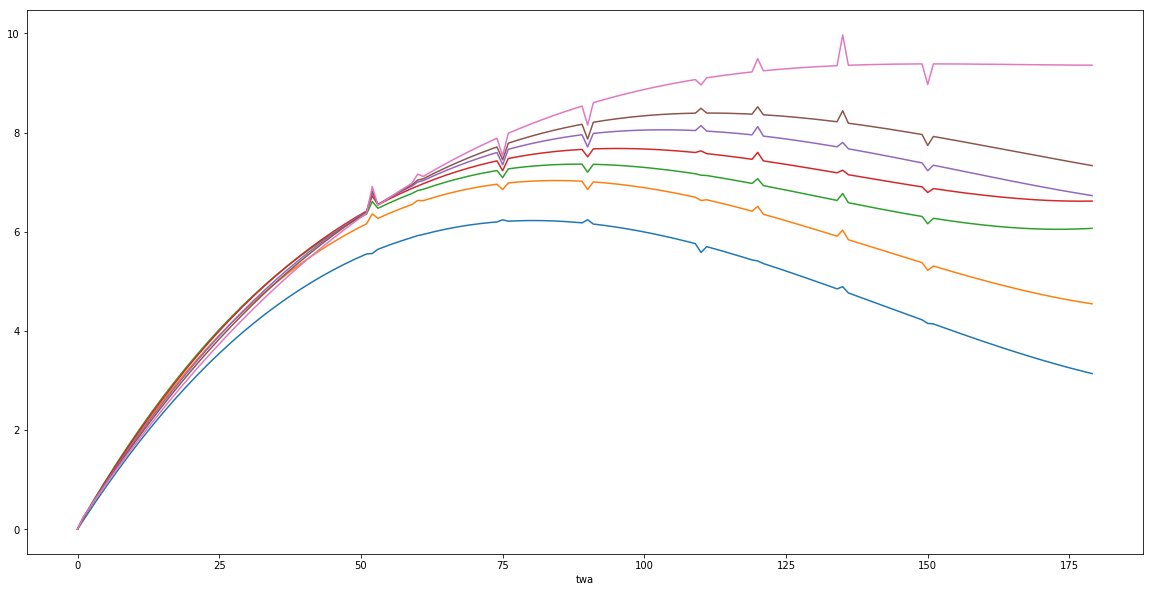

In [96]:
idx = np.arange(0, 180, 1)
df = data.reindex(idx)

import pandas as pd
#from cStringIO import StringIO
from scipy.optimize import curve_fit

# Do the original interpolation
df.interpolate(method='spline', order=3, inplace=True)

# Display result
print (df)
show(df)

# Function to curve fit to the data
def func(x, a, b, c, d):
    return a * (x ** 3) + b * (x ** 2) + c * x + d

# Initial parameter guess, just to kick off the optimization
guess = (0.5, 0.5, 0.5, 0.5)

# Create copy of data to remove NaNs for curve fitting
fit_df = df.dropna()

# Place to store function parameters for each column
col_params = {}

# Curve fit each column
for col in fit_df.columns:
    # Get x & y
    x = fit_df.index.astype(float).values
    y = fit_df[col].values
    # Curve fit column and get curve parameters
    params = curve_fit(func, x, y, guess)
    # Store optimized parameters
    col_params[col] = params[0]

# Extrapolate each column
for col in df.columns:
    # Get the index values for NaNs in the column
    x = df[pd.isnull(df[col])].index.astype(float).values
    # Extrapolate those points with the fitted function
    df[col][x] = func(x, *col_params[col])

# Display result
print(df)
show(data)
show(df)
